1. ECG-data (3 points)
Read a dataset from an ecg-measurement:

1) Make a line-plot with time (column 'ts') on the x-axis and ecg (column 'ecg') on the y-axis.

2) Edit the timestamps so that they are in seconds from the beginning of the measurement (ie reduce all ts values by the first timestamp). The 'ts' column is already measured in seconds so no other conversions are required. 

3) To make sure that the data really looks like what ECG data should look like, plot in a separate figure just the first 30 seconds.

In [3]:
# read dataset ecg.csv
import numpy as np
ecg = np.genfromtxt("data/ecg.csv", names=True, delimiter=",")

Text(0.5, 1.0, 'ECG singal over time')

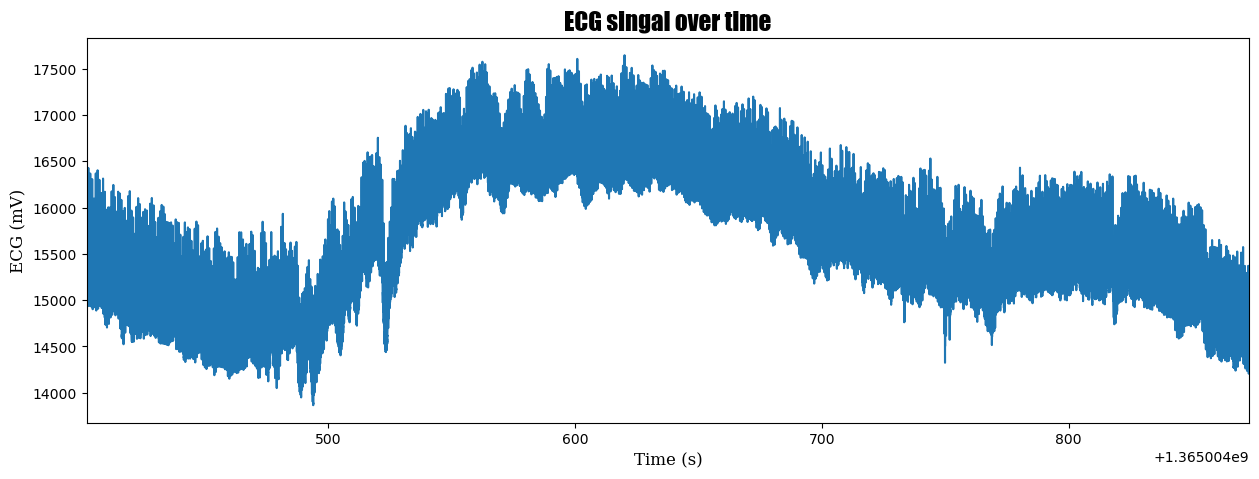

In [4]:
# Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 5))
plt.plot(ecg["ts"], ecg["ecg"])
plt.xlim(min(ecg['ts']), max(ecg['ts']))
plt.xlabel("Time (s)", fontname = "serif", fontsize = 12)
plt.ylabel("ECG (mV)", fontname = "serif", fontsize = 12)
plt.title("ECG singal over time", fontname = "fantasy", fontsize = 18)

In [5]:
ecg['ts']

array([1.36500440e+09, 1.36500440e+09, 1.36500440e+09, ...,
       1.36500487e+09, 1.36500487e+09, 1.36500487e+09])

Text(0.5, 1.0, 'ECG singal over time')

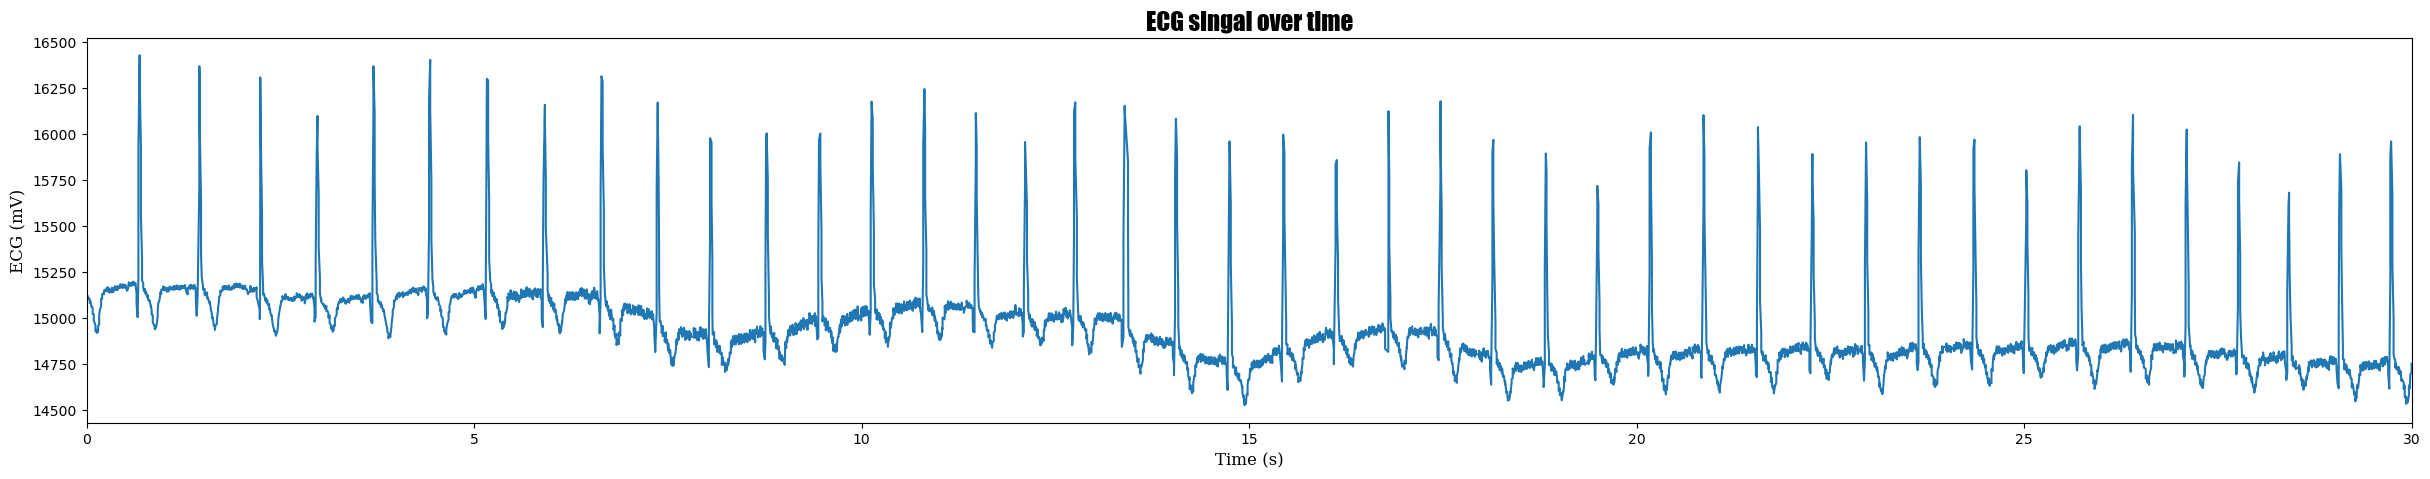

In [6]:
# Edit the timestamps so that they are in seconds from the beginning of the measurement (ie reduce all ts values by the first timestamp). The 'ts' column is already measured in seconds so no other conversions are required. 
ecg["ts"] = ecg["ts"] - ecg["ts"][0]
ecg_30s = ecg[ecg["ts"]<30]
# Plot the first 30 seconds of the data
plt.figure(figsize = (30,5))
plt.plot(ecg_30s["ts"], ecg_30s["ecg"])
plt.xlim(0,30)
plt.xlabel("Time (s)", fontname = "serif", fontsize = 12)
plt.ylabel("ECG (mV)", fontname = "serif", fontsize = 12)
plt.title("ECG singal over time", fontname = "fantasy", fontsize = 18)

2. ECG filtering (3 points)
The signal clearly has a lot of low frequency (i.e. slow) "ripples" but we're mostly interested in high frequency (i.e. fast) changes that indicate the heart rate (each 'spike' in the signal = one beat of the heart). We can get the rippling separated from the signal with low pass filtering (i.e. filtering the data with a kind of a sliding average). There are many possible ways to extract the low frequency part of the signal but let's use a mean/uniform filter for now.

Calculate the low frequency component by calling the function scipy.ndimage.uniform_filter (import scipy.ndimage). The function takes the data and the size of the window over which we average over as arguments. Looking at the data, 0.5 seconds would seem like a good time window to average over, but do note that sampling rate for the data is 128 Hz and the window size is given to the function as the number of samples to average over. 

Finally, separate the high frequency part of the signal by subtracting the low-frequency portion from the original signal (high_freq_component = original_signal - filtered_signal). Plot these frequency components into separate figures.


(0.0, 470.9500799179077)

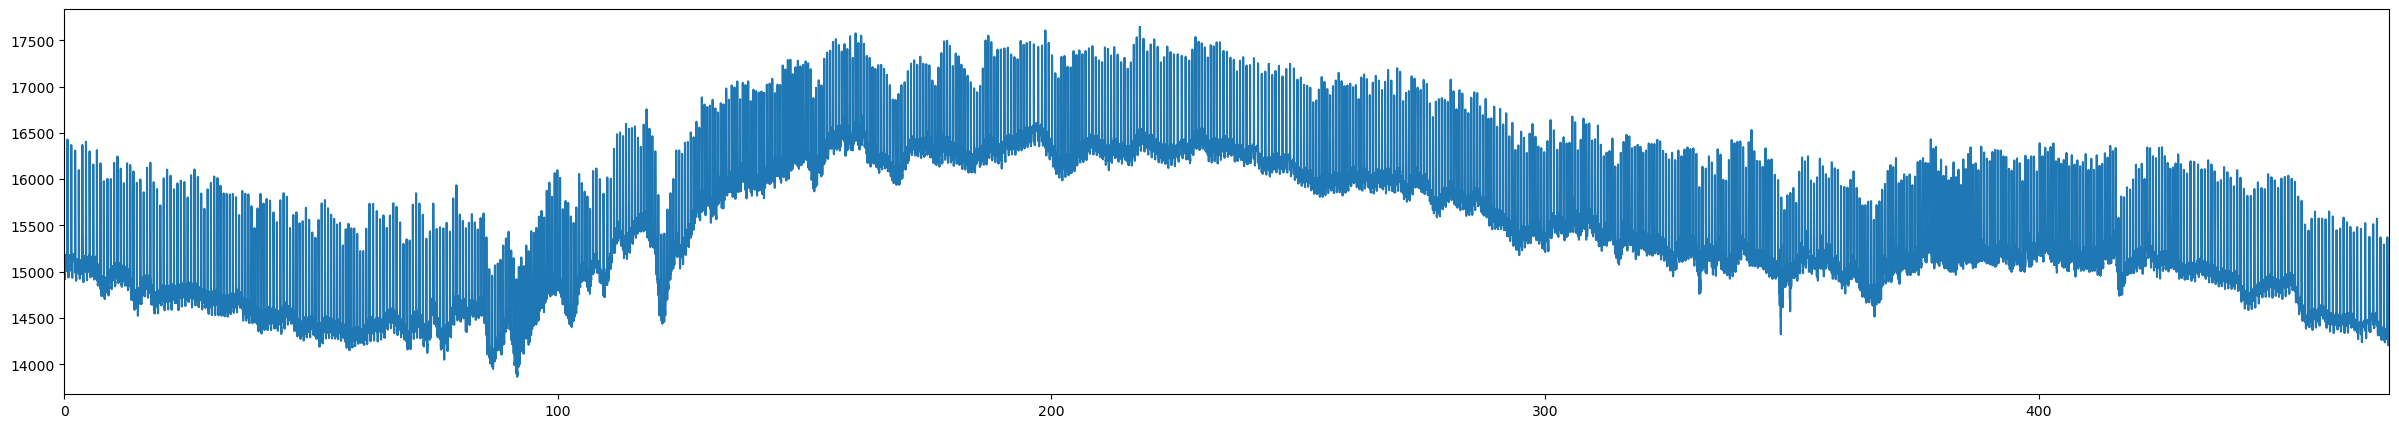

In [12]:
ecg_1s = ecg[ecg["ts"]<1]

import scipy.ndimage as nd
ecg_filtered = nd.uniform_filter(ecg["ecg"], size=0.5)
high_freq_component = ecg["ecg"] - ecg_filtered
# plot the low frequency component
plt.figure(figsize = (30,5))
plt.plot(ecg["ts"], ecg_filtered)
plt.xlim(min(ecg['ts']), max(ecg['ts']))

array([0., 0., 0., ..., 0., 0., 0.])

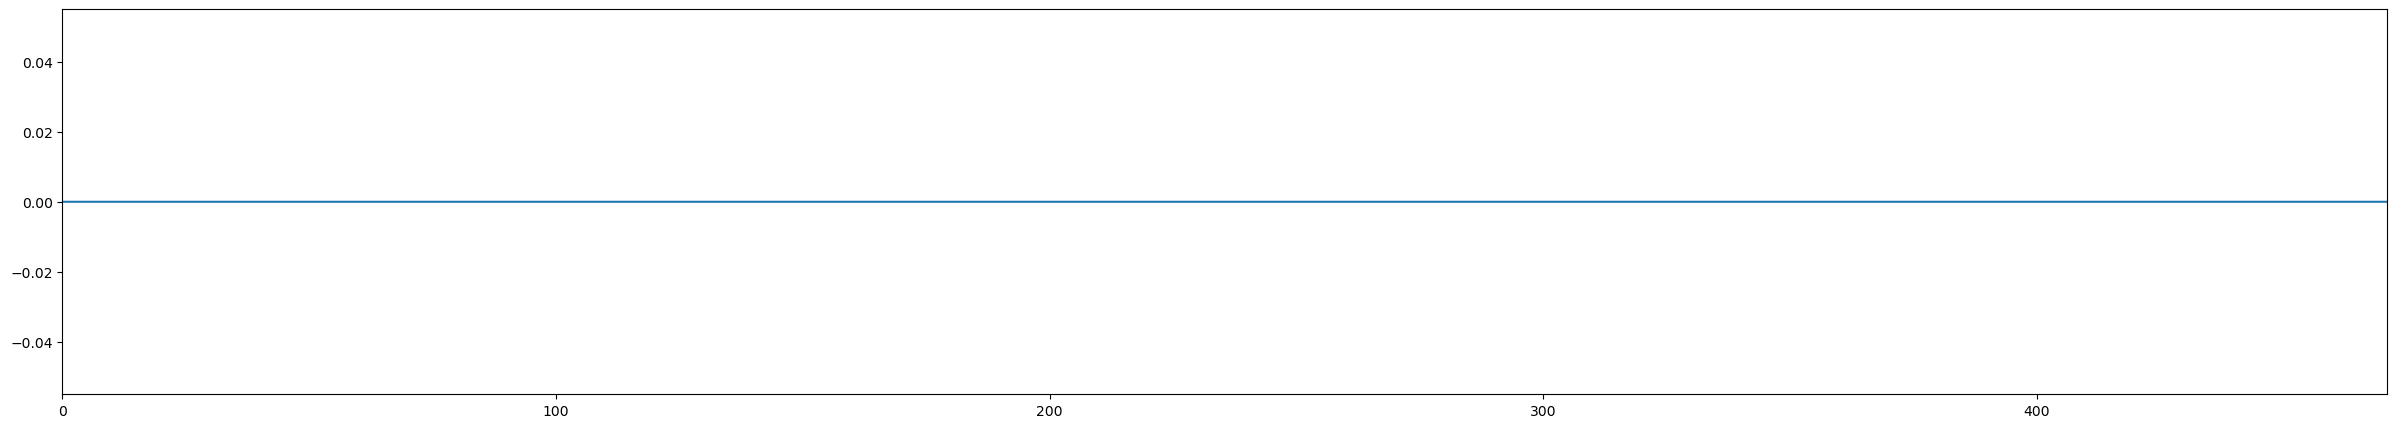

In [14]:
# plot the high frequency component
plt.figure(figsize = (30,5))
plt.plot(ecg["ts"], high_freq_component)
plt.xlim(min(ecg['ts']), max(ecg['ts']))
high_freq_component

In [23]:
ecg_1s = (ecg[ecg["ts"]<2]) & (ecg[ecg["ts"]>1])



TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''